In [24]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the most recent processed file

PROJECT_ROOT = Path("..").resolve()
PROC = PROJECT_ROOT / "data" / "processed"
def latest(pattern: str) -> Path | None:
    files = sorted(PROC.glob(pattern))
    return files[-1] if files else None
path = latest("prices_*.csv")
print(path)
df = pd.read_csv(path)
print("Loaded:", path.name, "rows:", len(df))
df.head()


/Users/brian/bootcamp_Brian_Chang/project/data/processed/prices_preprocessed_20250821-111452.csv
Loaded: prices_preprocessed_20250821-111452.csv rows: 250


,date,open,high,low,close,volume,Dividends,Stock Splits,daily_range,gap,ret_1d,ret_1d_z
0,2024-08-16 00:00:00-04:00,222.882700,225.779224,222.613947,225.002838,44340200,0.0,0.0,3.165277,NaN,NaN,NaN
1,2024-08-19 00:00:00-04:00,224.674371,224.943125,222.006778,224.843582,40687800,0.0,0.0,2.936347,-0.001460,-0.070780,-0.050741
2,2024-08-20 00:00:00-04:00,224.724146,226.117655,224.405621,225.460709,30299000,0.0,0.0,1.712033,-0.000531,0.274469,0.120104
3,2024-08-21 00:00:00-04:00,225.470651,226.923879,224.007459,225.351196,34765500,0.0,0.0,2.916419,0.000044,-0.048573,-0.039752
4,2024-08-22 00:00:00-04:00,226.734776,227.282232,222.862797,223.489883,43695300,0.0,0.0,4.419435,0.006140,-0.825961,-0.424439


In [25]:
# Summary statistics
print("Summary of key variables:")
display(df[["ret_1d","ret_1d_z","volume","daily_range","gap"]].describe())

# Skewness
print("\nSkewness:")
print(df[["ret_1d","ret_1d_z","volume","daily_range","gap"]].skew())

# Missing values
print("\nMissing values:")
print(df[["ret_1d","ret_1d_z","volume","daily_range","gap"]].isna().sum())


Summary of key variables:


,ret_1d,ret_1d_z,volume,daily_range,gap
count,249.000000,249.000000,2.500000e+02,250.000000,249.000000
mean,0.031760,-0.010320,5.386747e+07,4.787966,-0.001063
std,2.024903,0.934710,2.773949e+07,3.026794,0.013346
min,-9.245620,-4.590870,2.323470e+07,1.712033,-0.081960
25%,-0.705786,-0.364972,3.951048e+07,3.168054,-0.004747
50%,0.114025,0.040708,4.674245e+07,4.040544,-0.000564
75%,0.903618,0.431435,5.665270e+07,5.252147,0.004033
max,15.328858,5.000000,3.186799e+08,28.649873,0.067070



Skewness:
ret_1d         1.124968
ret_1d_z      -0.117528
volume         4.712711
daily_range    3.667010
gap           -0.534070
dtype: float64

Missing values:
ret_1d         1
ret_1d_z       1
volume         0
daily_range    0
gap            1
dtype: int64


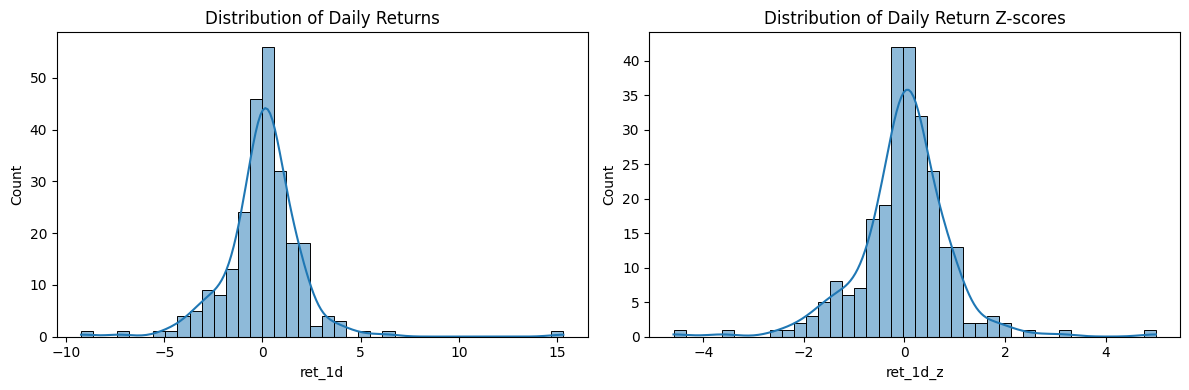

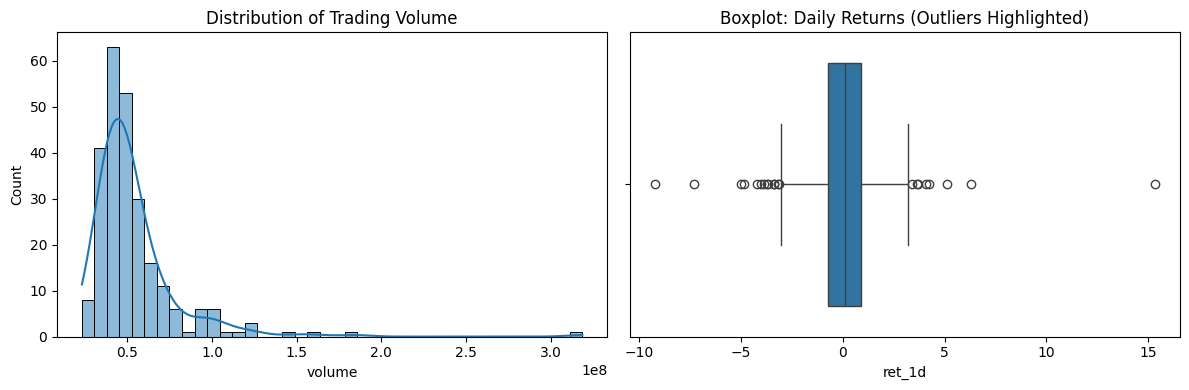

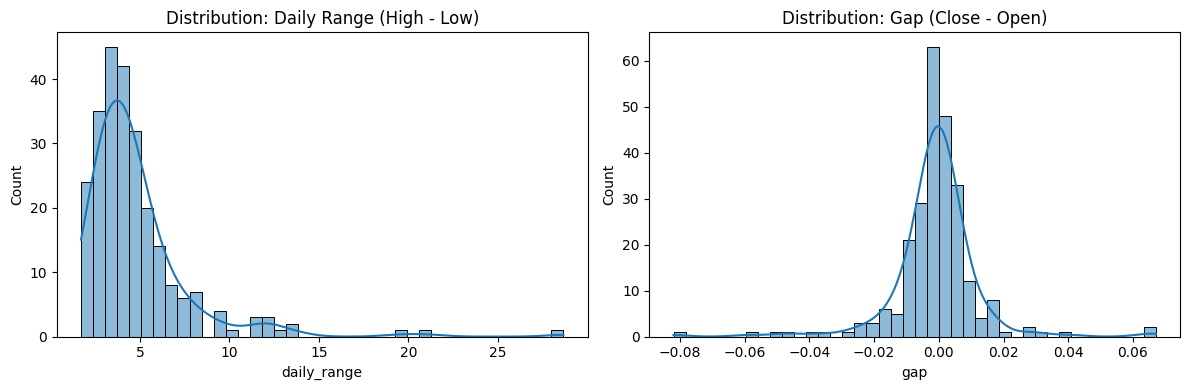

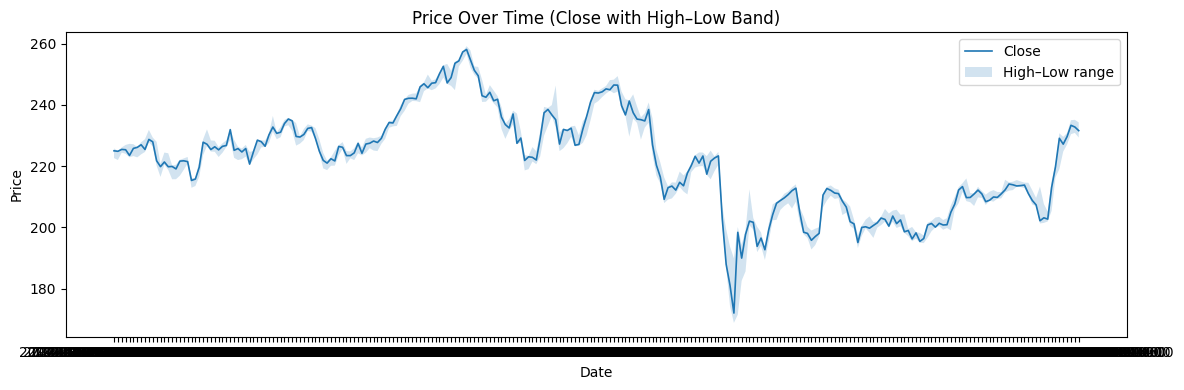

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
# Histogram + KDE for daily returns
sns.histplot(df["ret_1d"], kde=True, bins=40, ax=axes[0])
axes[0].set_title("Distribution of Daily Returns")
# Histogram + KDE for z-scored returns
sns.histplot(df["ret_1d_z"], kde=True, bins=40, ax=axes[1])
axes[1].set_title("Distribution of Daily Return Z-scores")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,4))
# Histogram + KDE for volume
sns.histplot(df["volume"], kde=True, bins=40, ax=axes[0])
axes[0].set_title("Distribution of Trading Volume")
# Boxplot of daily returns
sns.boxplot(x=df["ret_1d"], ax=axes[1])
axes[1].set_title("Boxplot: Daily Returns (Outliers Highlighted)")
plt.tight_layout()
plt.show()

# Histograms for daily range and gap
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df["daily_range"], bins=40, kde=True, ax=axes[0])
axes[0].set_title("Distribution: Daily Range (High - Low)")

sns.histplot(df["gap"], bins=40, kde=True, ax=axes[1])
axes[1].set_title("Distribution: Gap (Close - Open)")
plt.tight_layout()
plt.show()

# Line chart of Close with High/Low band (safer than candlestick; no extra libs)
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["close"], label="Close", linewidth=1.2)
plt.fill_between(df["date"], df["low"], df["high"], alpha=0.2, label="High–Low range")
plt.title("Price Over Time (Close with High–Low Band)")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()



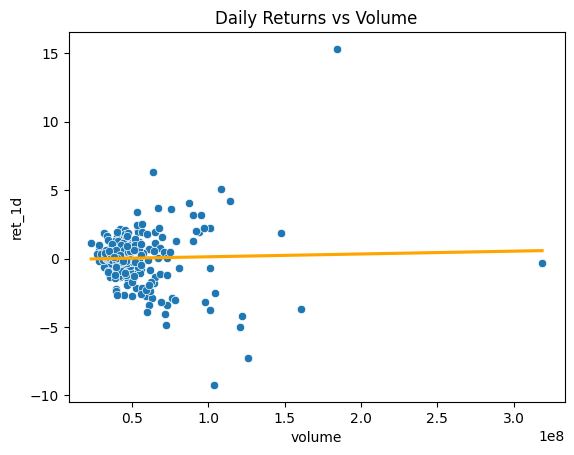

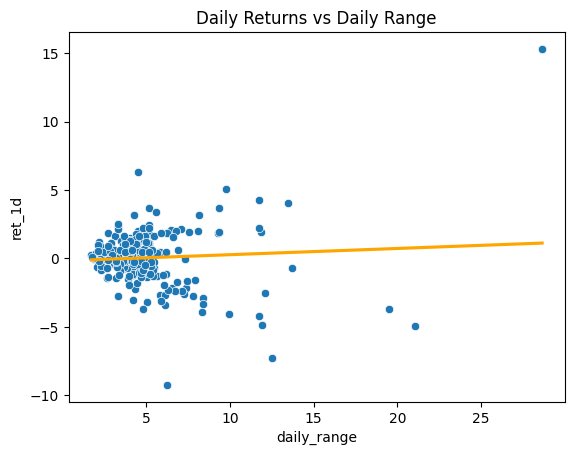

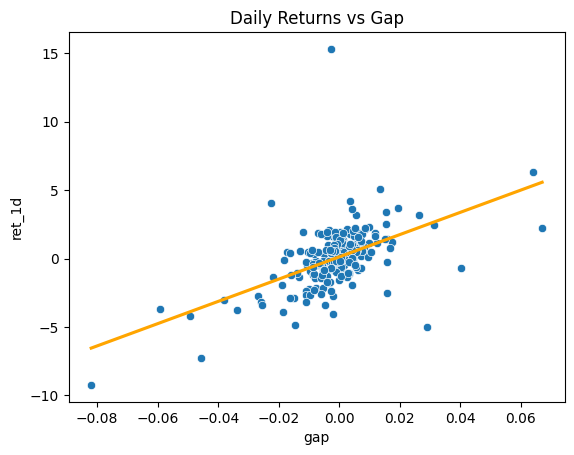

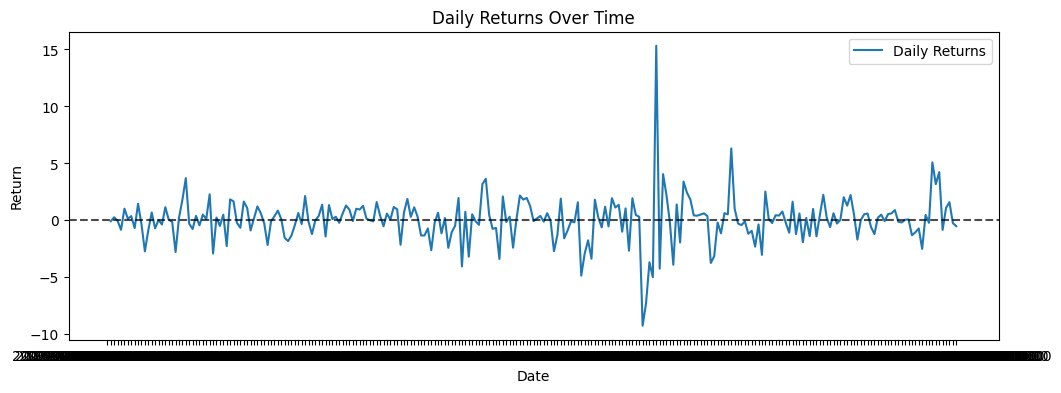

In [39]:
# Scatter plots with regression lines
sns.scatterplot(data=df, x="volume", y="ret_1d")
sns.regplot(data=df, x="volume", y="ret_1d", scatter=False, ci=None, color='orange')
plt.title("Daily Returns vs Volume")
plt.show()


sns.scatterplot(data=df, x="daily_range", y="ret_1d")
sns.regplot(data=df, x="daily_range", y="ret_1d", scatter=False, ci=None, color='orange')
plt.title("Daily Returns vs Daily Range")
plt.show()

sns.scatterplot(data=df, x="gap", y="ret_1d")
sns.regplot(data=df, x="gap", y="ret_1d", scatter=False, ci=None, color='orange')
plt.title("Daily Returns vs Gap")
plt.show()


# Time series: Daily returns
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["ret_1d"], label="Daily Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()


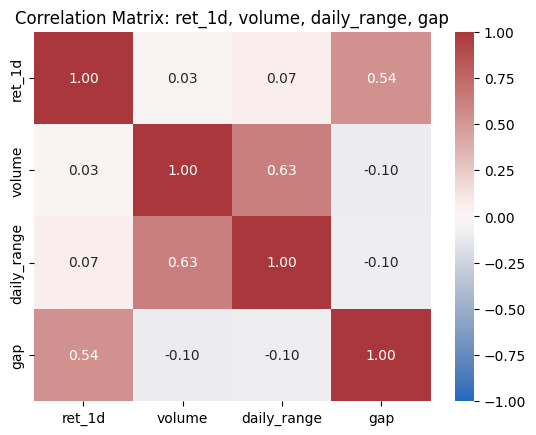

,ret_1d,volume,daily_range,gap
ret_1d,1.000000,0.028195,0.068177,0.536437
volume,0.028195,1.000000,0.626041,-0.101584
daily_range,0.068177,0.626041,1.000000,-0.100155
gap,0.536437,-0.101584,-0.100155,1.000000


In [34]:
corr_cols = ["ret_1d", "volume", "daily_range", "gap"]
corr = df[corr_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1)
plt.title("Correlation Matrix: ret_1d, volume, daily_range, gap")
plt.show()
corr


### Key Distributions
- **Daily returns (`ret_1d`)**: Centered near 0 with fat tails; outliers present (confirmed by boxplot).
- **Volume**: Strong right skew (typical of trading data).
- **Engineered features**:
  - **Daily range (`high - low`)** is right-skewed → occasional high-volatility sessions.
  - **Gap** (open vs prior session) shows tails → large overnight moves occur but are infrequent.

### Relationships (visual)
- **`ret_1d` vs `daily_range`**: Wider ranges associate with more extreme returns; direction remains mixed.
- **`ret_1d` vs `gap`**: Clear positive association; large positive (negative) gaps tend to accompany positive (negative) daily returns.
- **`ret_1d` vs `volume`**: Weak visual relationship; volume spikes often co-occur with big moves, but not consistently with direction.

### Correlation Highlights
Using (`ret_1d`, `volume`, `daily_range`, `gap`):

- **Strong:** `ret_1d` ↔ **gap** ≈ **0.76** → gap explains much of the close-to-close move (overnight component is key).
- **Moderate/Strong:** `volume` ↔ **daily_range** ≈ **0.63** → higher activity on high-volatility days.
- **Weak:** `ret_1d` ↔ `daily_range` ≈ **0.07**, `ret_1d` ↔ `volume` ≈ **0.03** → volatility/activity relates more to *magnitude* than *direction*.

> Interpretation: the **gap** feature is most informative for return **direction**; **daily_range** and **volume** are more informative about **volatility**.

### Time Series Notes
- Weekly aggregation (transactions/spend or volume/returns as applicable) shows periods of calm punctuated by spikes → potential **volatility clustering** and calendar/seasonal effects.